### 1a
a) Les inn og forstå dataene. Se hvilke kolonner som finnes og fjern kolonnene dere ikke kommer til å trenge til plottingen eller analysen. Plot:

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [212]:
#laster inn data og kvitter oss med noe 
data = pd.read_csv("..//Data/compas-scores-two-years.csv")
data = data[data["days_b_screening_arrest"] <= 30]
data = data[data["days_b_screening_arrest"] >= -30]

In [213]:
df = pd.DataFrame({
    "kvinne": data.sex == "Female",
    "hvit": data.race == "Caucasian",
    "svart": data.race == "African-American",
    "tilbakefall": data.two_year_recid == 1,
    "predikert_tilbakefall": data.score_text != "Low",
    "lav_score": data.score_text == "Low",
    "medium_score": data.score_text == "Medium",
    "høy_score": data.score_text == "High",})

In [215]:
def prosentandel(fokus, gruppe):
    return float(f'{len(df[fokus & gruppe]) / len(df[gruppe]) * 100:.1f}')

def barplott(fokusliste, gruppeliste, kol_navn, rad_navn, tittel, ha_tabell = 'Ja'):
    tabell = pd.DataFrame(columns=kol_navn)
    
    for i,fokus in enumerate(fokusliste):
        tabell.loc[i] = [prosentandel(fokus, gruppe) for gruppe in gruppeliste]
    tabell.index = rad_navn
    ax = tabell.plot.bar(colormap='Set3', figsize=(8,6), rot=0)
    ax.set_ylabel('Prosentandel')
    ax.set_title(tittel)
    
    if ha_tabell == 'Ja':
        display(tabell)         


### hvor ofte ulike grupperinger av mennesker(kvinner, menn, hvite og svarte) gjentar forbrytelser og blir predikert å begå straffbare handlinger i framtiden (som andel, ikke totalt antall).

,Kvinner,Menn,Hvite,Svarte
Tilbakefallende,35.1,47.9,39.1,52.3
Predikert tilbakefallende,40.5,45.5,33.1,57.6


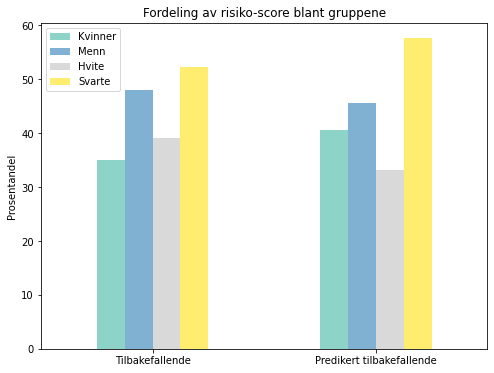

In [216]:
resid_predresid = [df.tilbakefall, df.predikert_tilbakefall]
gruppe = [df.kvinne, ~df.kvinne, df.hvit, df.svart]
gruppenavn = ['Kvinner', 'Menn', 'Hvite', 'Svarte']
resid_predresid_navn = ['Tilbakefallende', 'Predikert tilbakefallende']
tittel = 'Fordeling av risiko-score blant gruppene'
barplott(resid_predresid, gruppe, gruppenavn, resid_predresid_navn, tittel)


### hvor ofte ulike grupper fikk ulike risikoskårer.


,Kvinner,Menn,Hvite,Svarte
Lav score,59.5,54.5,66.9,42.4
Medium score,27.7,25.7,22.5,31.0
Høy score,12.9,19.9,10.6,26.6


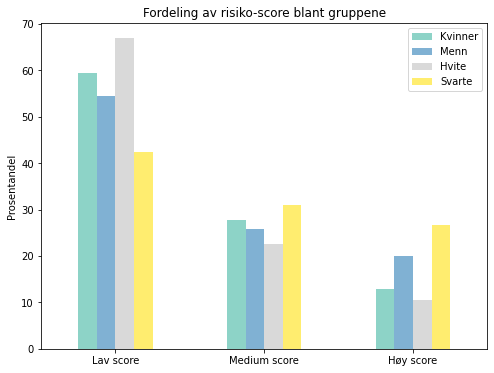

In [217]:
score = [df.lav_score, df.medium_score, df.høy_score]
score_navn = ['Lav score', 'Medium score', 'Høy score']
tittel = 'Fordeling av risiko-score blant gruppene'

barplott(score, gruppe, gruppenavn, score_navn, tittel)


### hvor ofte de som begikk nye straffbare hadlinger (og de som ikke gjorde det) fikk ulike risikoskårer, og hvordan dette ser ut hvis du kun ser på hvite eller svarte.

,Tilbakefallende,Ikke-tilbakefallende
Lav score,38.3,69.7
Medium score,31.5,21.4
Høy score,30.2,8.8


,Tilbakefallende hvite,Tilbakefallende svarte,Ikke-tilbakefallende hvite,Ikke-tilbakefallende svarte
Lav score,49.6,28.5,78.0,57.7
Medium score,30.7,33.4,17.3,28.4
Høy score,19.7,38.2,4.8,13.9


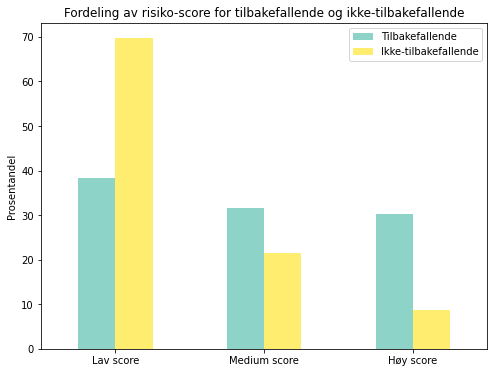

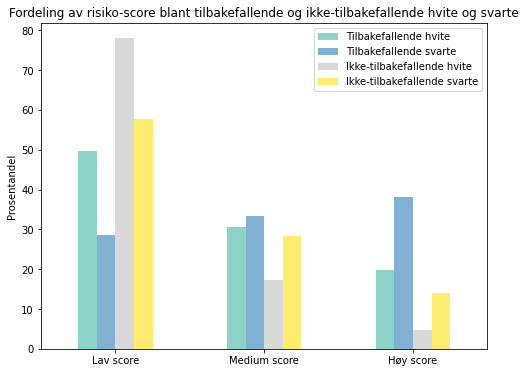

In [218]:
resid = [df.tilbakefall, ~df.tilbakefall]
resid_navn = ['Tilbakefallende', 'Ikke-tilbakefallende']
tittel = 'Fordeling av risiko-score for tilbakefallende og ikke-tilbakefallende'

barplott(score, resid, resid_navn, score_navn, tittel, ha_tabell = 'Ja')

etnisk_resid = [df.hvit & df.tilbakefall, df.svart & df.tilbakefall, df.hvit & ~df.tilbakefall, df.svart & ~df.tilbakefall]
score_navn = ['Lav score', 'Medium score', 'Høy score']
etnisk_resid_navn = ["Tilbakefallende hvite", "Tilbakefallende svarte","Ikke-tilbakefallende hvite","Ikke-tilbakefallende svarte"]
tittel = 'Fordeling av risiko-score blant tilbakefallende og ikke-tilbakefallende hvite og svarte'

barplott(score, etnisk_resid, etnisk_resid_navn, score_navn, tittel)